In [1]:
import pandas as pd
df = pd.read_csv("Misc Files/Bike_data_sprint_1.csv")
df['last_update'] = pd.to_datetime(df['last_update'])
smithF = df.loc[df['name'] == 'SMITHFIELD NORTH']#isolate one station
smithF = smithF.groupby('last_update')['available_bikes'].mean().reset_index()#combine all the data collected at the same time and average, not necessary as th value shouldnt change
smithF = smithF.set_index('last_update')


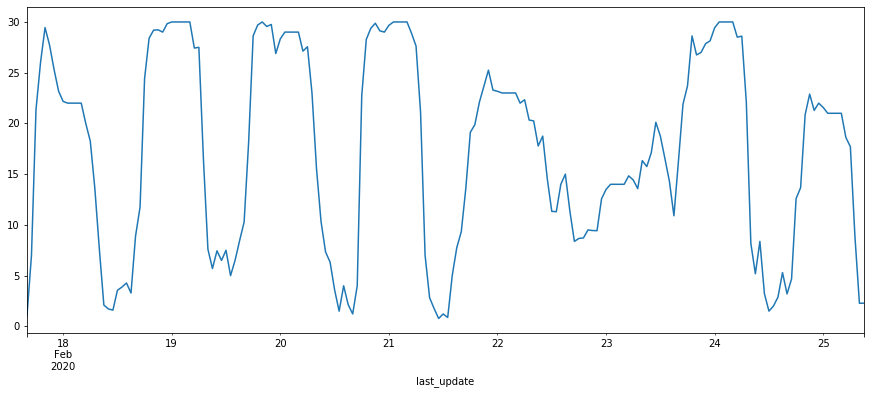

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
y = smithF['available_bikes'].resample('H').mean()#taking the mean value for an hour for plotting purposeses
y.plot(figsize=(15, 6))
plt.show()

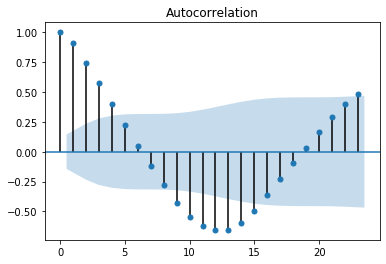

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y)
plt.show()

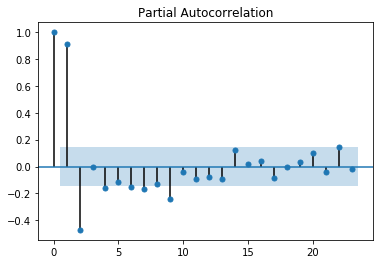

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y)
plt.show()

In [5]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(y, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.available_bikes   No. Observations:                  185
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -484.502
Method:                       css-mle   S.D. of innovations              3.318
Date:                Tue, 03 Mar 2020   AIC                            983.004
Time:                        09:05:46   BIC                           1005.547
Sample:                    02-17-2020   HQIC                           992.140
                         - 02-25-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0294      0.443      0.066      0.947      -0.839       0.898
ar.L1.D.available_bikes     0.5029      0.073      6.845      0.000       0.359       0.647


In [6]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

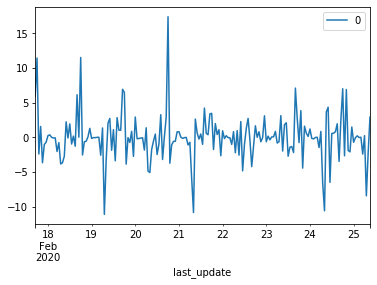

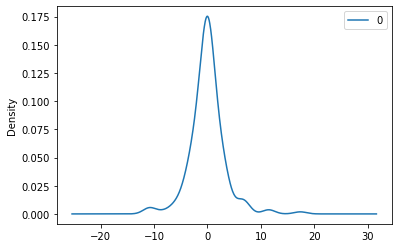

                0
count  185.000000
mean    -0.008512
std      3.333941
min    -11.117333
25%     -1.321453
50%     -0.036482
75%      1.100290
max     17.387215


In [7]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Test MSE: 9.151


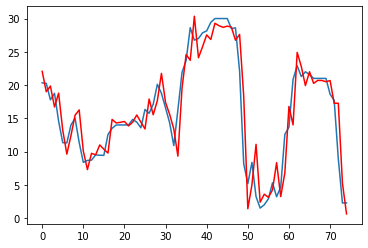

In [8]:
from sklearn.metrics import mean_squared_error
X = y.values
size = int(len(X) * 0.6)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,4))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [9]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [10]:
arma_order_select_ic(y, ic=['aic', 'bic'], trend='nc')

{'aic':              0            1            2
 0          NaN  1422.308384  1255.289089
 1  1029.575530   986.951573   983.579081
 2   978.421225   980.420828   981.943822
 3   980.420916   982.320756   983.897373
 4   981.894246   983.875157   985.874699,
 'bic':              0            1            2
 0          NaN  1428.759877  1264.966329
 1  1036.027023   996.628813   996.482068
 2   988.098465   993.323815   998.072555
 3   993.323903   998.449490  1003.251853
 4   998.022980  1003.229637  1008.454925,
 'aic_min_order': (2, 0),
 'bic_min_order': (2, 0)}

Test MSE: 8.804


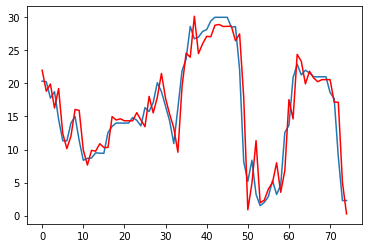

In [15]:
from sklearn.metrics import mean_squared_error
X = y.values
size = int(len(X) * 0.6)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

[21.99366679 21.28980752 20.45144872 19.63302488 18.92508872 18.36884645
 17.9708446  17.71598077 17.57793981 17.52682459 17.53417984 17.57584242
 17.63314038 17.69295379 17.74708327 17.79127773 17.8241741  17.84631157
 17.8593094  17.86524206 17.86620838 17.86406923 17.86031839 17.85604886]


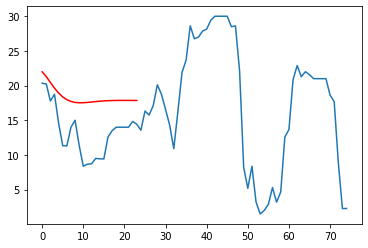

In [14]:
from sklearn.metrics import mean_squared_error
predictions = []
X = y.values
size = int(len(X) * 0.6)
train, test = X[0:size], X[size:len(X)]

model = ARIMA(train, order=(2,0,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(24)
yhat = output[0]
predictions.append(yhat)
print(predictions[0])
# plot
plt.plot(test)
plt.plot(predictions[0], color='red')
plt.show()